In [3]:
!python -m spacy download fr_core_news_sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 50.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [8]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np

def clean_and_embed(df,content):
    # Load the spaCy model for French texts
    nlp = spacy.load('fr_core_news_sm')

    embeddings = []

    def process_text(text):
        # Tokenize and clean the text with spaCy
        doc = nlp(text)
        # Extract word embeddings for each token
        token_embeddings = [token.vector for token in doc if not token.is_punct and not token.is_space]
        if token_embeddings:
            mean_embedding = np.mean(token_embeddings, axis=0)
            embeddings.append(mean_embedding)

    df['cleaned_content'] = df[content].apply(lambda x: ' '.join(x.split()))  # Remove extra whitespace
    df['cleaned_content'].apply(process_text)

    df['embeddings'] = embeddings

    return df



In [11]:
df = pd.read_csv("./data/fr_covid_news_8k.csv")

In [12]:
df.head()

,date_publish,description,maintext,title,url,labels
0,2021-11-12 15:21:42,"Selon les informations du Télégramme, les auto...","Selon les informations du Télégramme, les auto...",Covid-19 : découverte d’une souche très rare d...,https://www.valeursactuelles.com/regions/breta...,"['sante', 'societe']"
1,2021-11-13 21:29:59,La mesure sera instaurée dès lundi prochain da...,L’Autriche fait face à une hausse des cas. Et ...,Covid-19 : l’Autriche veut confiner les person...,https://www.valeursactuelles.com/monde/covid-1...,"['sante', 'international']"
2,NaN,Découvrez nos conseils et bonnes pratiques pou...,Nous ne sommes pas tous égaux face au télétrav...,Être efficace en télétravail,https://formation-professionnelle.lemonde.fr/g...,['sante']
3,NaN,Toute l’actualité sur le sujet L'Afrique face ...,"Covid-19 : au Sénégal, les réticences face au ...",L'Afrique face au Covid-19,https://www.lemonde.fr/l-afrique-face-au-covid...,"['sante', 'international']"
4,2020-09-30 06:50:18,"Frédérique Vidal, ministre de l'Enseignement s...",Covid-19: Frédérique Vidal affirme qu'il n'y a...,Covid-19: Frédérique Vidal affirme qu'il n'y a...,http://video.lefigaro.fr/figaro/video/covid-19...,"['sante', 'societe']"


In [13]:
cleaned_df = clean_and_embed(df,'title')

In [18]:
cleaned_df.head()

,date_publish,description,maintext,title,url,labels,cleaned_content,embeddings
0,2021-11-12 15:21:42,"Selon les informations du Télégramme, les auto...","Selon les informations du Télégramme, les auto...",Covid-19 : découverte d’une souche très rare d...,https://www.valeursactuelles.com/regions/breta...,"['sante', 'societe']",Covid-19 : découverte d’une souche très rare d...,"[0.59988517, -0.97008914, 0.8553505, -0.186295..."
1,2021-11-13 21:29:59,La mesure sera instaurée dès lundi prochain da...,L’Autriche fait face à une hausse des cas. Et ...,Covid-19 : l’Autriche veut confiner les person...,https://www.valeursactuelles.com/monde/covid-1...,"['sante', 'international']",Covid-19 : l’Autriche veut confiner les person...,"[0.53189296, 1.889239, -0.2509089, -0.67962873..."
2,NaN,Découvrez nos conseils et bonnes pratiques pou...,Nous ne sommes pas tous égaux face au télétrav...,Être efficace en télétravail,https://formation-professionnelle.lemonde.fr/g...,['sante'],Être efficace en télétravail,"[-1.7836496, 0.1686557, 1.325203, -0.8814247, ..."
3,NaN,Toute l’actualité sur le sujet L'Afrique face ...,"Covid-19 : au Sénégal, les réticences face au ...",L'Afrique face au Covid-19,https://www.lemonde.fr/l-afrique-face-au-covid...,"['sante', 'international']",L'Afrique face au Covid-19,"[-0.10371275, -1.6222557, 1.782233, -1.4129431..."
4,2020-09-30 06:50:18,"Frédérique Vidal, ministre de l'Enseignement s...",Covid-19: Frédérique Vidal affirme qu'il n'y a...,Covid-19: Frédérique Vidal affirme qu'il n'y a...,http://video.lefigaro.fr/figaro/video/covid-19...,"['sante', 'societe']",Covid-19: Frédérique Vidal affirme qu'il n'y a...,"[-1.2450637, 0.020321913, -0.6168888, -0.63496..."


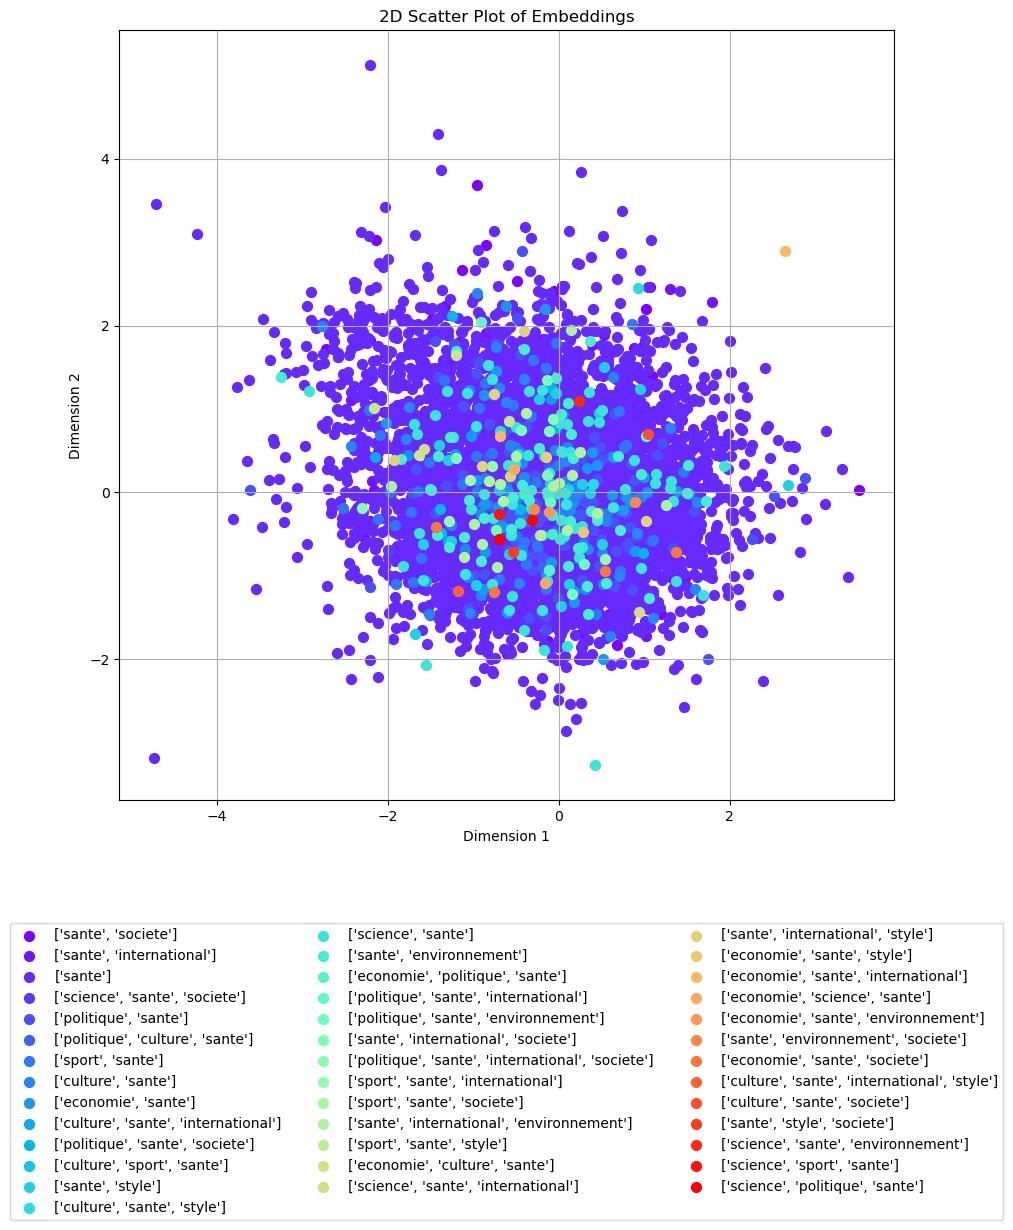

In [22]:
import matplotlib.cm as cm
plt.figure(figsize=(10, 10))

# Get unique labels
unique_labels = cleaned_df['labels'].unique()
n_labels = len(unique_labels)

# Create a colormap for the labels!
colors = cm.rainbow(np.linspace(0, 1, n_labels))

for i, label in enumerate(unique_labels):
    subset = cleaned_df[cleaned_df['labels'] == label]
    embeddings = np.vstack(subset['embeddings'])
    plt.scatter(embeddings[:, 0], embeddings[:, 1], label=label, c=[colors[i]], s=50)

plt.title('2D Scatter Plot of Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

/Users/nicolasgakrelidz/opt/anaconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


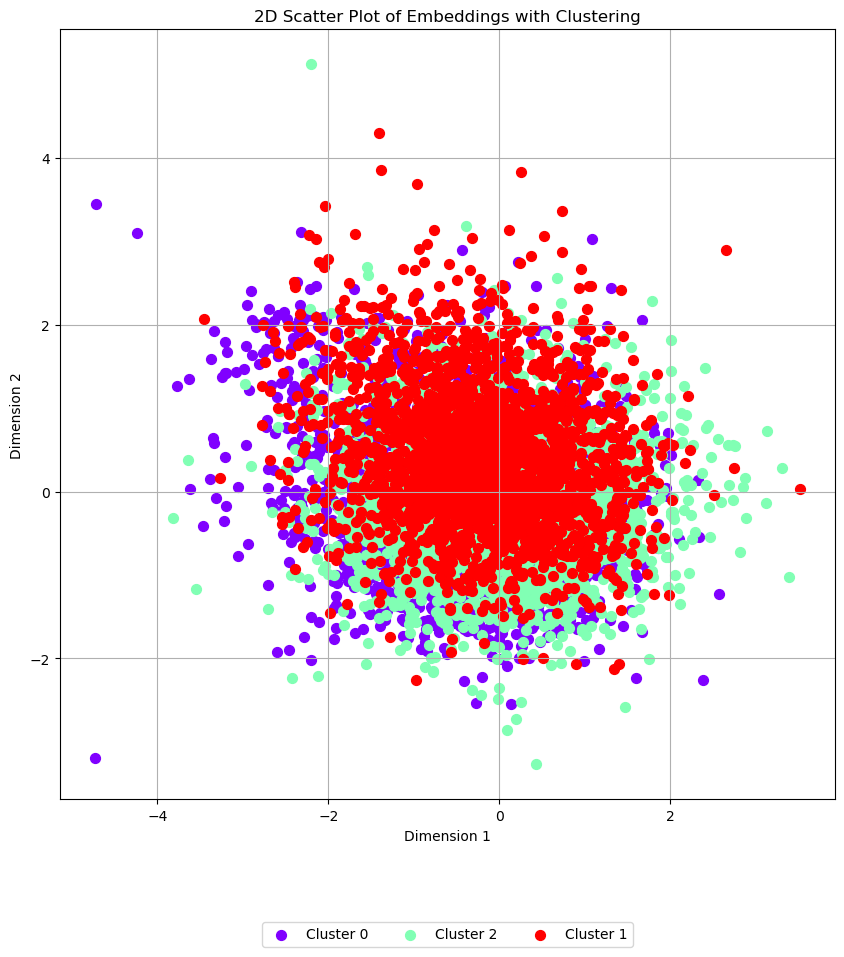

In [23]:
from sklearn.cluster import KMeans
# Let s get rough
n_clusters = 3 
embeddings = np.vstack(cleaned_df['embeddings'])
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cleaned_df['Cluster'] = kmeans.fit_predict(embeddings)

# scatter plot with colors based on clusters
plt.figure(figsize=(10, 10))

unique_clusters = cleaned_df['Cluster'].unique()
n_clusters = len(unique_clusters)

colors = cm.rainbow(np.linspace(0, 1, n_clusters))

for i, cluster in enumerate(unique_clusters):
    subset = cleaned_df[cleaned_df['Cluster'] == cluster]
    embeddings = np.vstack(subset['embeddings'])
    plt.scatter(embeddings[:, 0], embeddings[:, 1], label=f'Cluster {cluster}', c=[colors[i]], s=50)

plt.title('2D Scatter Plot of Embeddings with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()


In [24]:
## let's select and inspect some extreme rows...
cleaned_df[(cleaned_df['embeddings'].apply(lambda x: x[0]) < -4) & (cleaned_df['embeddings'].apply(lambda x: x[1]) > 0)]

,date_publish,description,maintext,title,url,labels,cleaned_content,embeddings,Cluster
215,2020-12-08 20:04:43,"Vers un «Beauvau de la sécurité», des Britanni...",L’actu Tensions dans la police. Dans un courri...,8 décembre 2020 à 20:04,https://www.liberation.fr/direct/element/vers-...,['sante'],8 décembre 2020 à 20:04,"[-4.2344227, 3.0987434, -1.9843725, 3.0728247,...",0
7812,NaN,Un vaccinodrome est un lieu de vaccination mis...,Un vaccinodrome est un lieu de vaccination mis...,Vaccinodrome,https://www.futura-sciences.com/sante/definiti...,['sante'],Vaccinodrome,"[-4.7158155, 3.4525232, -2.799571, -0.01833820...",0


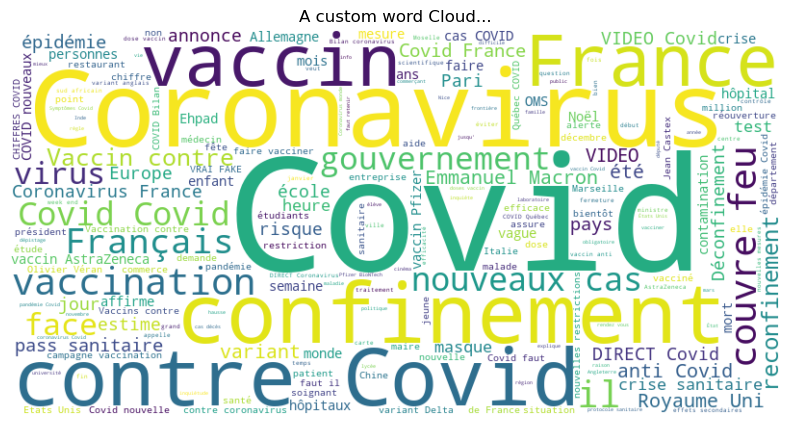

In [30]:
from wordcloud import WordCloud

#nlp = spacy.load("fr_core_news_sm")

def make_wordcloud(df, text_column, remove_stopwords=True, min_word_length=3):

    text = " ".join(df[text_column].astype(str))
    
    doc = nlp(text)
    
    filtered_text = [token.text for token in doc if (not remove_stopwords or not token.is_stop) and len(token.text) >= min_word_length]
    
    filtered_text = " ".join(filtered_text)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(filtered_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('A custom word Cloud...')
    plt.show()

make_wordcloud(cleaned_df, 'cleaned_content', remove_stopwords=True, min_word_length=3)
